# Titanic 

Take up the Titanic project again, and insert a deep-learning into it to see if you can improve your results!

https://www.kaggle.com/c/titanic

![](https://plus.lesoir.be/sites/default/files/dpistyles_v2/ena_16_9_extra_big/2019/04/12/node_218060/26251893/public/2019/04/12/B9719141564Z.1_20190412142710_000+GO7DBN7S7.1-0.jpg?itok=UrOcJg8T)

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
data_features = "./titanic/train.csv"
target = "./titanic/target.csv"
test_features = "./titanic/test.csv"


In [7]:
train_dataset = pd.read_csv(data_features)
test_dataset = pd.read_csv(test_features)

target_dataset = pd.read_csv(target)

In [8]:
from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler,
    OneHotEncoder,
    OrdinalEncoder,
)
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [9]:
column_names = train_dataset.columns
for column in column_names:
    print(column + " - " + str(train_dataset[column].isnull().sum()))

display(train_dataset.dtypes)


PassengerId - 0
Survived - 0
Pclass - 0
Name - 0
Sex - 0
Age - 177
SibSp - 0
Parch - 0
Ticket - 0
Fare - 0
Cabin - 687
Embarked - 2


PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Après analyse des données on constate que 

- ne sert a rien dans notre cas : 
    1) passenger_id
    2) Name
    3) Cabin (trop disparate)
    4) Ticket (trop disparate)

- doit combler les null :
    1) Age
    2) Embarked

Survived
0    549
1    342
Name: count, dtype: int64

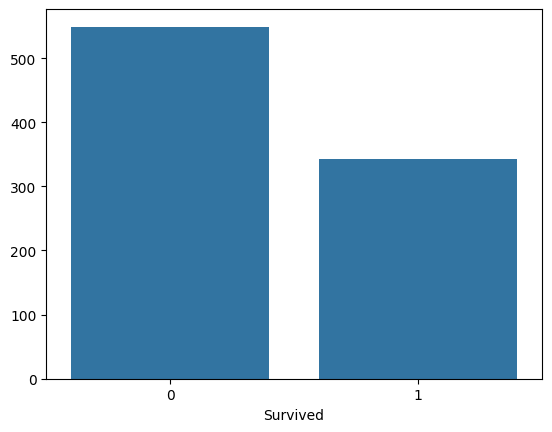

In [10]:
# Count the values of the 'Survived' column
survived_counts = train_dataset.Survived.value_counts()
sns.barplot(x=survived_counts.index, y=survived_counts.values)
train_dataset.Survived.value_counts()


## Hypothesis 1 Pclass involved in survival rate

In [11]:
# Count the values of the 'Pclass' column and sort by index
pclass_counts = train_dataset.Pclass.value_counts().sort_index()
pclass_survivors = (
    train_dataset.groupby("Pclass")["Survived"].value_counts().unstack().sort_index()
)
pclass_survivors["total"] = pclass_survivors[0] + pclass_survivors[1]
pclass_survivors["survival_rate_based_on_class"] = (
    pclass_survivors[1] / pclass_survivors["total"]
)
display(pclass_survivors)


Survived,0,1,total,survival_rate_based_on_class
Pclass,,,,
1,80,136,216,0.629630
2,97,87,184,0.472826
3,372,119,491,0.242363


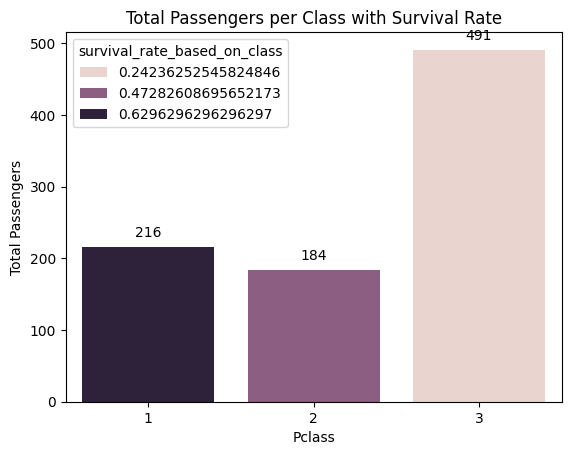

In [12]:
ax = sns.barplot(
    x=pclass_survivors.index,
    y=pclass_survivors["total"],
    hue=pclass_survivors["survival_rate_based_on_class"],
)

# Add labels and title
plt.xlabel("Pclass")
plt.ylabel("Total Passengers")
plt.title("Total Passengers per Class with Survival Rate")

# Annotate the bars with the total counts and survival rates
for i in range(len(pclass_survivors)):
    ax.annotate(
        f"{int(pclass_survivors['total'].iloc[i])}",
        (i, pclass_survivors["total"].iloc[i]),
        ha="center",
        va="bottom",
        xytext=(0, 5),
        textcoords="offset points",
    )
# Show the plot
plt.show()


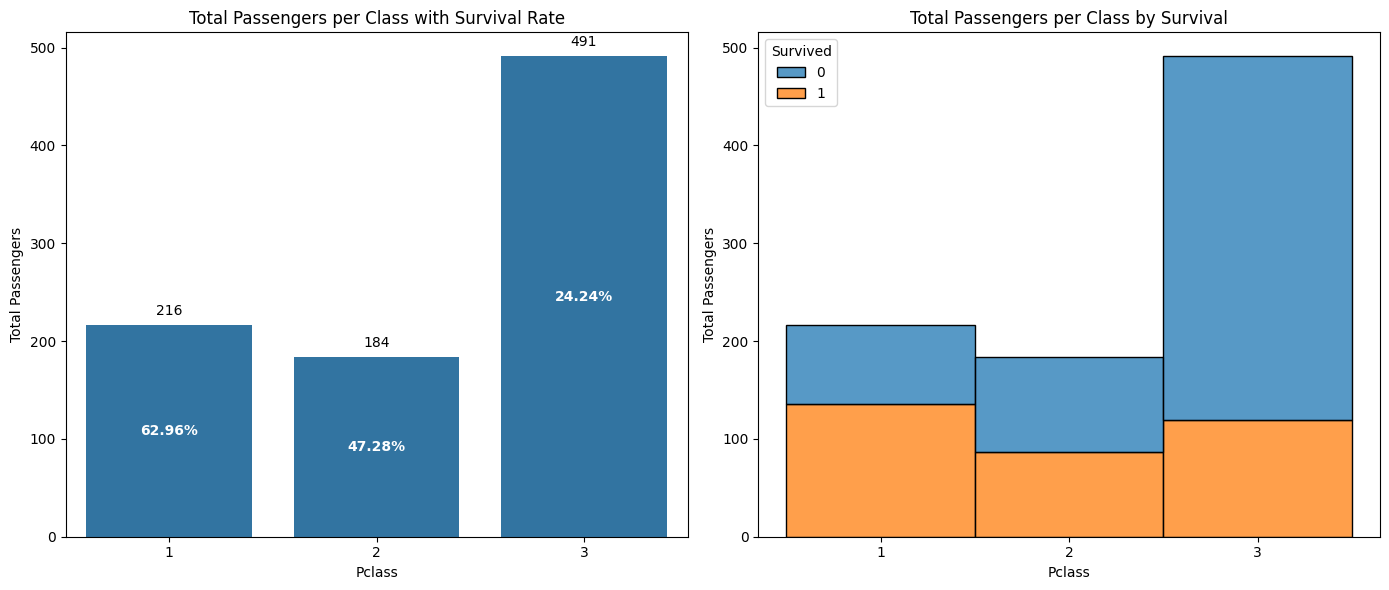

In [13]:
# Créer une figure avec deux sous-graphiques
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Premier graphique avec annotations
ax1 = sns.barplot(ax=axes[0], x=pclass_survivors.index, y=pclass_survivors["total"])
axes[0].set_xlabel("Pclass")
axes[0].set_ylabel("Total Passengers")
axes[0].set_title("Total Passengers per Class with Survival Rate")

for i in range(len(pclass_survivors)):
    ax1.annotate(
        f"{int(pclass_survivors['total'].iloc[i])}",
        (i, pclass_survivors["total"].iloc[i]),
        ha="center",
        va="bottom",
        xytext=(0, 5),
        textcoords="offset points",
    )
    ax1.annotate(
        f"{pclass_survivors['survival_rate_based_on_class'].iloc[i]:.2%}",
        (i, pclass_survivors["total"].iloc[i] / 2),
        ha="center",
        va="center",
        xytext=(0, 0),
        textcoords="offset points",
        color="white",
        weight="bold",
    )

# Deuxième graphique sans annotations
ax2 = sns.histplot(
    ax=axes[1],
    x="Pclass",
    hue="Survived",
    multiple="stack",
    data=train_dataset,
    discrete=True,
)
axes[1].set_xlabel("Pclass")
axes[1].set_ylabel("Total Passengers")
axes[1].set_title("Total Passengers per Class by Survival")
axes[1].set_xticks([1, 2, 3])

# Afficher la figure
plt.tight_layout()
plt.show()


## Conclusion Hypothesis 1
Pclass is involved in Survival

## Hypothesis 2 Gender involved in Survival

In [14]:
Sex_counts = train_dataset.Sex.value_counts().sort_index()
gender_survivors = (
    train_dataset.groupby("Sex")["Survived"].value_counts().unstack().sort_index()
)
gender_survivors["total"] = gender_survivors[0] + gender_survivors[1]
gender_survivors["survival_rate_based_on_sex"] = (
    gender_survivors[1] / gender_survivors["total"]
)
gender_survivors


Survived,0,1,total,survival_rate_based_on_sex
Sex,,,,
female,81,233,314,0.742038
male,468,109,577,0.188908


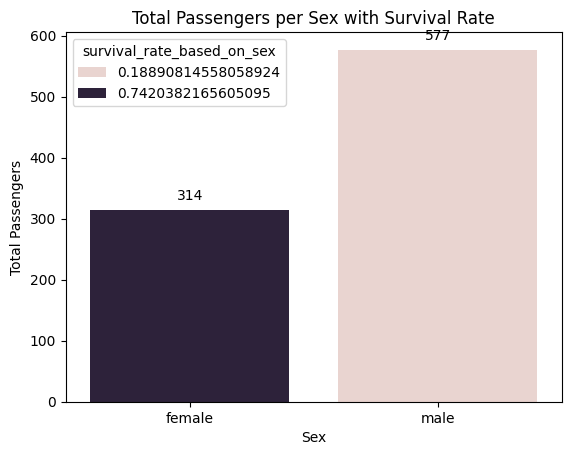

In [15]:
ax = sns.barplot(
    x=gender_survivors.index,
    y=gender_survivors["total"],
    hue=gender_survivors["survival_rate_based_on_sex"],
)

# Add labels and title
plt.xlabel("Sex")
plt.ylabel("Total Passengers")
plt.title("Total Passengers per Sex with Survival Rate")

# Annotate the bars with the total counts and survival rates
for i in range(len(gender_survivors)):
    ax.annotate(
        f"{int(gender_survivors['total'].iloc[i])}",
        (i, gender_survivors["total"].iloc[i]),
        ha="center",
        va="bottom",
        xytext=(0, 5),
        textcoords="offset points",
    )
# Show the plot
plt.show()


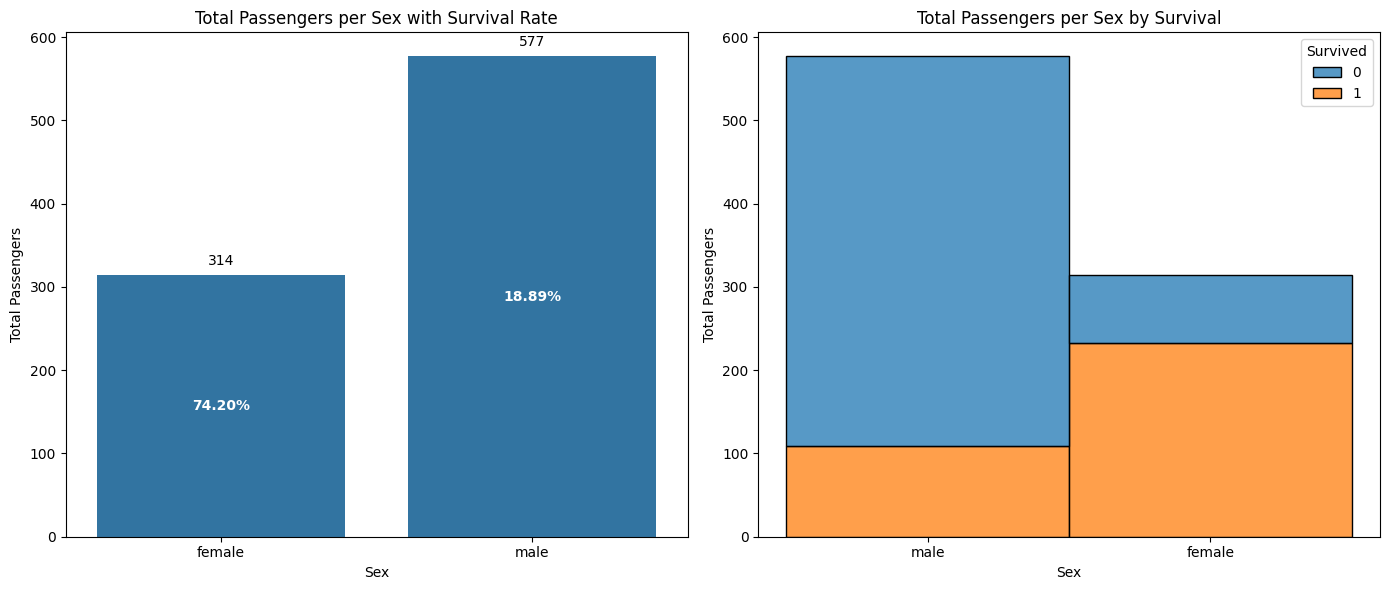

In [16]:
# Créer une figure avec deux sous-graphiques
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Premier graphique avec annotations
ax1 = sns.barplot(ax=axes[0], x=gender_survivors.index, y=gender_survivors["total"])
axes[0].set_xlabel("Sex")
axes[0].set_ylabel("Total Passengers")
axes[0].set_title("Total Passengers per Sex with Survival Rate")

for i in range(len(gender_survivors)):
    ax1.annotate(
        f"{int(gender_survivors['total'].iloc[i])}",
        (i, gender_survivors["total"].iloc[i]),
        ha="center",
        va="bottom",
        xytext=(0, 5),
        textcoords="offset points",
    )
    ax1.annotate(
        f"{gender_survivors['survival_rate_based_on_sex'].iloc[i]:.2%}",
        (i, gender_survivors["total"].iloc[i] / 2),
        ha="center",
        va="center",
        xytext=(0, 0),
        textcoords="offset points",
        color="white",
        weight="bold",
    )

# Deuxième graphique sans annotations
ax2 = sns.histplot(
    ax=axes[1],
    x="Sex",
    hue="Survived",
    multiple="stack",
    data=train_dataset,
    discrete=True,
)
axes[1].set_xlabel("Sex")
axes[1].set_ylabel("Total Passengers")
axes[1].set_title("Total Passengers per Sex by Survival")


# Afficher la figure
plt.tight_layout()
plt.show()


## Conclusion on hypothesis 2 
gender is involved on the survival rate

In [17]:
def preprocess(df1, df2, target_column, corr=False):
    # Concatenate the dataframes
    tempdf = df2.copy()
    df = pd.concat([df1, tempdf], axis=0)

    # Remove useless columns
    df = df.drop(columns=["Name", "Ticket", "Cabin", "PassengerId","SibSp","Parch"])
    # Identify numerical and categorical features
    numerical_features = df.select_dtypes(include=["int64", "float64"]).columns.tolist()
    categorical_features = df.select_dtypes(include=["object"]).columns.tolist()

    # Create transformers for numerical and categorical features
    numerical_transformer = Pipeline(
        steps=[
            ("imputer", KNNImputer()),
            ("scaler", MinMaxScaler()),
        ]
    )

    categorical_transformer = Pipeline(
        steps=[
            ("imputer", SimpleImputer(strategy="most_frequent")),
            ("encoder", OneHotEncoder(drop="first")),
        ]
    )

    # Combine transformers into a ColumnTransformer
    preprocessor = ColumnTransformer(
        transformers=[
            ("num", numerical_transformer, numerical_features),
            ("cat", categorical_transformer, categorical_features),
        ]
    )

    # Apply the preprocessing pipeline to the features
    X_preprocessed = preprocessor.fit_transform(df)

    # Get the feature names
    feature_names = preprocessor.get_feature_names_out()

    # Convert the preprocessed data back to a DataFrame with the feature names
    X_preprocessed_df = pd.DataFrame(X_preprocessed, columns=feature_names)

    y = X_preprocessed_df[target_column]
    y = np.ceil(y).astype(int)
    X = X_preprocessed_df.drop(columns=[target_column])

    if corr:
        corrmat = X_preprocessed_df.corr()
        f, ax = plt.subplots(figsize=(12, 9))
        sns.heatmap(corrmat, vmax=0.8, square=True, annot=True)
        plt.show()

    return X, y


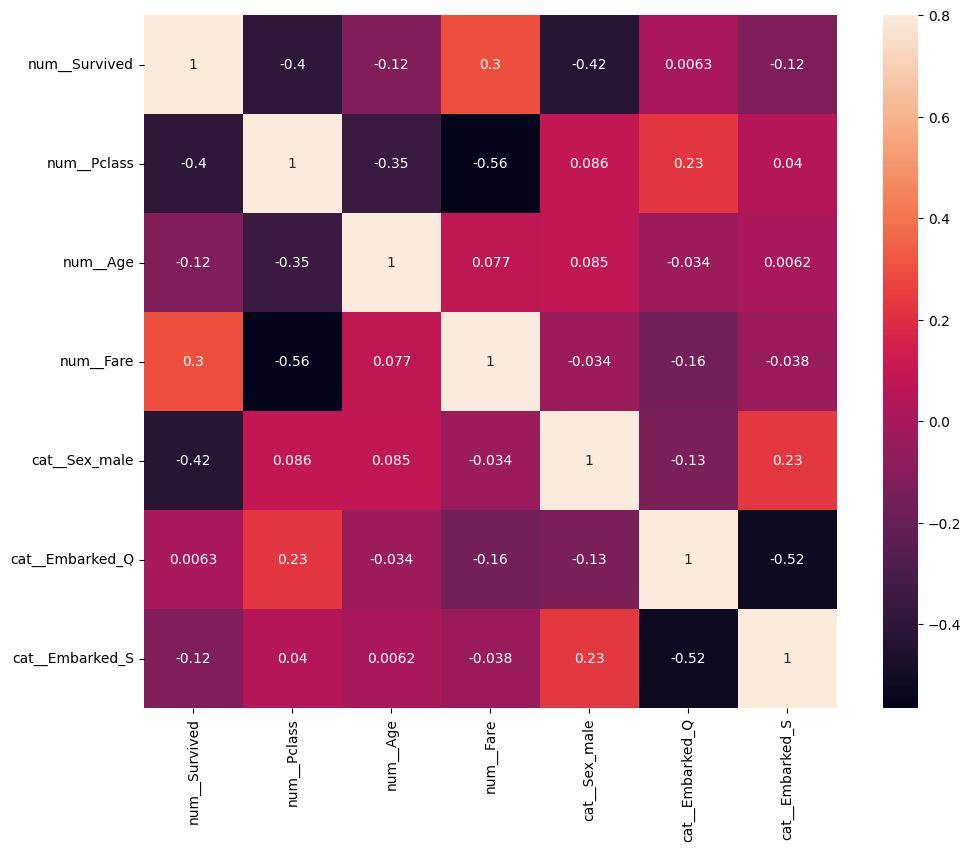

In [18]:
## Loading Dataset
X, y = preprocess(
    train_dataset, target_dataset, target_column="num__Survived", corr=True
)


In [19]:
print(X.shape)

(1309, 6)


### Dataset shape 
~ (1309 x 8) => 8 input neurons

In [20]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2


In [21]:
# model = tf.keras.Sequential()
# # input layer
# model.add(keras.Input(shape=(10,)))
# # hidden layers
# model.add(Dense(64, activation="relu"))
# model.add(Dropout(0.2))
# model.add(Dense(32, activation="relu"))
# model.add(Dropout(0.2))
# # output layers
# model.add(Dense(1, activation="sigmoid"))

# opt = keras.optimizers.Adam(learning_rate=0.01)
# model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# history = model.fit(X, y, epochs=100, batch_size=32, validation_split=0.3)



In [22]:
Survived_counts = train_dataset.Survived.value_counts().sort_index()
total_person = Survived_counts[0] + Survived_counts[1]


class_weights = {
    0: (1 / Survived_counts[0]) * (total_person / 2.0),
    1: (1 / Survived_counts[1]) * (total_person / 2.0),
}


In [23]:
model = tf.keras.Sequential()
# input layer
model.add(Dense(10, input_shape=(6,)))

# hidden layers
model.add(Dense(10, activation="relu"))
# model.add(Dropout(0.2))
# model.add(Dense(20, activation="relu"))
# model.add(Dropout(0.2))

# output layers
model.add(Dense(1, activation="sigmoid"))

opt = keras.optimizers.Adam(learning_rate=0.0001)
# loss = keras.losses.BinaryCrossentropy(
#     from_logits=False, ##supposé résoudre le problème de val_accuracy constante
#     label_smoothing=0,
#     reduction=losses_utils.ReductionV2.AUTO,
#     name="binary_crossentropy",
# )
cbe=keras.losses.BinaryCrossentropy(
    from_logits=False,
    label_smoothing=0.0,
    axis=-1,
    reduction="sum_over_batch_size",
    name="binary_crossentropy",
    dtype=None,
)
model.compile(
    loss=cbe,
    optimizer="adam",
    metrics=["accuracy"],
)
history = model.fit(
    X, y, batch_size=2, epochs=30, validation_split=0.1, class_weight=class_weights
)


c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
589/589 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6605 - loss: 0.6799 - val_accuracy: 0.6641 - val_loss: 0.5600
Epoch 2/30
589/589 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7741 - loss: 0.5817 - val_accuracy: 0.6641 - val_loss: 0.4897
Epoch 3/30
589/589 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7745 - loss: 0.5309 - val_accuracy: 1.0000 - val_loss: 0.4728
Epoch 4/30
589/589 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8172 - loss: 0.4875 - val_accuracy: 1.0000 - val_loss: 0.4262
Epoch 5/30
589/589 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8010 - loss: 0.4959 - val_accuracy: 1.0000 - val_loss: 0.3685
Epoch 6/30
589/589 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8115 - loss: 0.4733 - val_accuracy: 1.0000 - val_loss: 0.3917
Epoch 7/30
589/589 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7901 - loss: 0.5045 - val_accuracy: 1.0000 - val_loss: 0.3217
Epoch 8/30
589/589 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8215 - loss: 0.4502 - val_accuracy: 1.

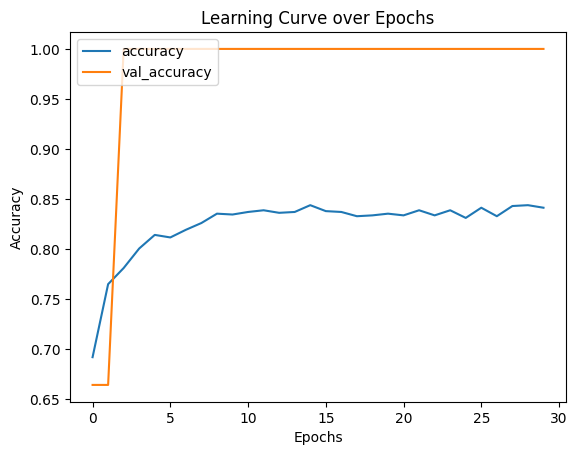

In [24]:
# learning curve history.accuracy / history.val_accuracy
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Learning Curve over Epochs")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["accuracy", "val_accuracy"], loc="upper left")
plt.show()


In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


# Function to plot validation curve
def plot_validation_curve(param_range, train_scores, val_scores, param_name):
    plt.figure(figsize=(10, 6))
    plt.plot(param_range, train_scores, label="Training Accuracy")
    plt.plot(param_range, val_scores, label="Validation Accuracy")
    plt.title(f"Validation Curve for {param_name}")
    plt.xlabel(param_name)
    plt.ylabel("Accuracy")
    plt.legend(loc="best")
    plt.grid()
    plt.show()


In [26]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()


In [27]:
X_test, y_test = preprocess(test_dataset, target_dataset, target_column="num__Survived")

In [28]:
# Make predictions on the test dataset
y_pred = model.predict(X_test) < 0.3


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


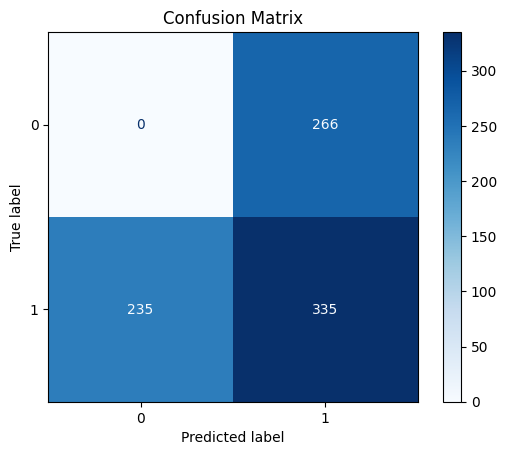

In [29]:
# Plot the confusion matrix
plot_confusion_matrix(y_test, y_pred)
